<a href="https://colab.research.google.com/github/Noraalmu/ominous-space-doodle/blob/codespace-noraalmu-ominous-space-doodle-9vgwwvrr7qxhgwx/21_May_GenInsight__Sentiment_analysis_code_arabic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import csv
import re # for regular expression
import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix


In [ ]:
# import nltk
# nltk.download("stopwords")
# arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))


 **Arabic stop words**

In [ ]:
arb_stopwords=open('/content/list stopwords.txt','r').read().split('\n')

In [ ]:
# change the seeting of the cells
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-50-9f436f4beb9c>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


###preprocessing



In [ ]:
# read csv file and save it in a data frame
data_df=pd.read_excel('./annotated text_tweets. .xlsx')
data_collection=pd.read_excel('/content/Dataset - to be labeled.xlsx')

In [ ]:
# how much data do we have?
len(data_df)

19409

In [ ]:
# How about if I want to see part of the data?
data_df[1000:1200]

,Tweet,Label,Company
1000,@Mobilyالسلام عليكمالـ sim غير صالح نقلت الشريحه بكذا جوال وموشغاله وحطيت شريحه بجوالي وإشتغلت يعني المشكله بالشريحه مو بالجوال !!!!,Negative,Mobily
1001,@Mobilyبعد الإشتراك في باقة واجد اكسترا جالسين تضعفوا النت ليش؟!! وكل مره اتصل يقول طفي الجوال وشغلوا؟! ليش النصب؟! https://t.co/BNuSwPuFvh,Negative,Mobily
1002,@Mobilyمرتين اشحن ب٣٠ وتسحبونها بدون ذمه وضمير والخدمات ماتفعلت مادري كيف عايشين وانتم تسرقون الناس حسبي الله #موبايلي,Negative,Mobily
1003,@mod6rb @STC_KSA @STCcare شقق الاغنياء فيها فايبر 😒,Negative,STC
1004,@mody0502 @ZainKSA نفس المشكلة,Negative,Zain
1005,@mofr7001 @ZainHelpSA ليس لدي ما اخفيه..افضل حل المشكله على العام لي 12 يوما على الخاص مافي نتيجه,Negative,Zain
1006,@MohammdAldweesh @STCcare طال عمرك له اكثر من سنه راكب رقم الكبينه على باب بيتي وكل مااكلم احد يرميني على الثاني من رقم الى رقم وبالاخيرلاشئ,Negative,STC
1007,@MohammdAldweesh @STCcare للاسف مافي حل وتشتكي عليهم هيئة الاتصالات داجين مثلهم مع العلم اني اشتكيت والى يومك مافي فايده,Negative,STC
1008,@MohammdAldweesh @STCcare ما بعد وصلني الالياف شكلي بركبها في بيتي بعد 10 سنين,Negative,STC
1009,@MohammdAldweesh @STCcare والعذر الاقبح من ذنب يقولك ما تعرفت الكبينه لهم اكثر من سنه مركبينها والى يومك ما عرفوها لا وكل هذا دي اس ال,Negative,STC


In [ ]:
data_df.head()

,Tweet,Label,Company
0,بغض النظر عن المبلغ التافه لو نجي نحسب عدد العملاء مضرباً في 5 بيطلع ملايين الملايين بدون وجه حق!!#موبايلي_تسرق_عم,Negative,Mobily
1,السلام عليكم اخوي انا ساكن في حي الرمال واعاني من مشكلة النت عندي لدرجة اني ماقدر اتصفح قوقل وش المشكله مع العلم انه كان تمام ع,Negative,STC
2,تدني خدمة الانترنت في محافظة ونتطلع ونطلب لفتح فروع بيشه,Negative,Zain
3,13 يوما لم يتصل احد يبدو انني ساحطم الارقام القياسيه في الصبرملاحظة:لا اعرف كيف استخدم الخاص ولا ارى له ضروره,Negative,Zain
4,Zain بإذن الله راح نرجع لـموبايلي في القريب العاجل ، على الأقل في احترام للعميل و سرعة تجاوب مع مشاكله,Negative,Zain


In [ ]:

'''
The first step is to subject the data to preprocessing.
This involves removing both arabic and english punctuation
Normalizing different letter variants with one common letter
'''
# first we define a list of arabic and english punctiations that we want to get rid of in our text

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Arabic stop words with nltk
stop_words = arb_stopwords

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    
    '''
    text is an arabic string input
    
    the preprocessed text is returned
    '''
    
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    #remove longation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text
  
data_df[' Tweet'] = data_df[' Tweet'].apply(preprocess)
print(data_df.head(5))

                                                                                                          Tweet  \
0  بغض النظر المبلغ التافه نجي نحسب العملاء مضربا 5 بيطلع ملايين الملايين بدون وجه حقموبايليتسرقعم                
1  السلام عليكم اخوي انا ساكن حي الرمال واعاني مشكله النت عندي لدرجه اني ماقدر اتصفح قوقل وش المشكله العلم تمام   
2  تدني خدمه الانترنت محافظه ونتطلع ونطلب لفتح فروع بيشه                                                          
3  13 يوما يتصل يبدو انني ساحطم الارقام القياسيه الصبرملاحظهلا اعرف استخدم الخاص اري ضروره                        
4  Zain باذن الله نرجع لموبايلي القريب العاجل الاقل احترام للعميل سرعه تجاوب مشاكله                               

      Label Company  
0  Negative  Mobily  
1  Negative  STC     
2  Negative  Zain    
3  Negative  Zain    
4  Negative  Zain    


In [ ]:
from nltk.corpus import stopwords

# stop_words = stopwords.words('arabic')
#  # spacy tokenizer 
# string_split = [token.text for token in nlp(string)]


# def remove_stopwords(text):
#     textArr = ' '.join(string_split)
#     rem_text = ' '.join([i for i in string.split() if i not in stop_words])
#     return rem_text

# def remove_stopwords(text):
#     textArr = str(text).split(' ')
#     rem_text = " ".join([i for i in textArr if i not in stop_words])
#     return rem_text

def remove_arabic_stopwords(text):
    textArr = str(text).split(' ')
    rem_text = " ".join([i for i in textArr if i not in arb_stopwords])
    return rem_text


data_df[' Tweet']=data_df[' Tweet'].apply(remove_arabic_stopwords)
print(data_df.head())

                                                                                                          Tweet  \
0  بغض النظر المبلغ التافه نجي نحسب العملاء مضربا 5 بيطلع ملايين الملايين بدون وجه حقموبايليتسرقعم                
1  السلام عليكم اخوي انا ساكن حي الرمال واعاني مشكله النت عندي لدرجه اني ماقدر اتصفح قوقل وش المشكله العلم تمام   
2  تدني خدمه الانترنت محافظه ونتطلع ونطلب لفتح فروع بيشه                                                          
3  13 يوما يتصل يبدو انني ساحطم الارقام القياسيه الصبرملاحظهلا اعرف استخدم الخاص اري ضروره                        
4  Zain باذن الله نرجع لموبايلي القريب العاجل الاقل احترام للعميل سرعه تجاوب مشاكله                               

      Label Company  
0  Negative  Mobily  
1  Negative  STC     
2  Negative  Zain    
3  Negative  Zain    
4  Negative  Zain    


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df[" Tweet"].apply(tokenizer.tokenize)

In [ ]:
data_df.head()

,Tweet,Label,Company,tokens
0,بغض النظر المبلغ التافه نجي نحسب العملاء مضربا 5 بيطلع ملايين الملايين بدون وجه حقموبايليتسرقعم,Negative,Mobily,"[بغض, النظر, المبلغ, التافه, نجي, نحسب, العملاء, مضربا, 5, بيطلع, ملايين, الملايين, بدون, وجه, حقموبايليتسرقعم]"
1,السلام عليكم اخوي انا ساكن حي الرمال واعاني مشكله النت عندي لدرجه اني ماقدر اتصفح قوقل وش المشكله العلم تمام,Negative,STC,"[السلام, عليكم, اخوي, انا, ساكن, حي, الرمال, واعاني, مشكله, النت, عندي, لدرجه, اني, ماقدر, اتصفح, قوقل, وش, المشكله, العلم, تمام]"
2,تدني خدمه الانترنت محافظه ونتطلع ونطلب لفتح فروع بيشه,Negative,Zain,"[تدني, خدمه, الانترنت, محافظه, ونتطلع, ونطلب, لفتح, فروع, بيشه]"
3,13 يوما يتصل يبدو انني ساحطم الارقام القياسيه الصبرملاحظهلا اعرف استخدم الخاص اري ضروره,Negative,Zain,"[13, يوما, يتصل, يبدو, انني, ساحطم, الارقام, القياسيه, الصبرملاحظهلا, اعرف, استخدم, الخاص, اري, ضروره]"
4,Zain باذن الله نرجع لموبايلي القريب العاجل الاقل احترام للعميل سرعه تجاوب مشاكله,Negative,Zain,"[Zain, باذن, الله, نرجع, لموبايلي, القريب, العاجل, الاقل, احترام, للعميل, سرعه, تجاوب, مشاكله]"


In [ ]:
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer

st = ISRIStemmer()
def stem_text(splitted_text):
    proccesed_text = []
    for s in splitted_text:        
        proccesed_text.append(st.stem(s))
    return proccesed_text

# print(stem_text(("ماوصلتني")))
data_df['stemmed'] = data_df['tokens'].apply(stem_text)
print(data_df.head())

                                                                                                          Tweet  \
0  بغض النظر المبلغ التافه نجي نحسب العملاء مضربا 5 بيطلع ملايين الملايين بدون وجه حقموبايليتسرقعم                
1  السلام عليكم اخوي انا ساكن حي الرمال واعاني مشكله النت عندي لدرجه اني ماقدر اتصفح قوقل وش المشكله العلم تمام   
2  تدني خدمه الانترنت محافظه ونتطلع ونطلب لفتح فروع بيشه                                                          
3  13 يوما يتصل يبدو انني ساحطم الارقام القياسيه الصبرملاحظهلا اعرف استخدم الخاص اري ضروره                        
4  Zain باذن الله نرجع لموبايلي القريب العاجل الاقل احترام للعميل سرعه تجاوب مشاكله                               

      Label Company  \
0  Negative  Mobily   
1  Negative  STC      
2  Negative  Zain     
3  Negative  Zain     
4  Negative  Zain     

                                                                                                                              tokens  \
0  [بغض, النظر, المبلغ, التافه, نج

In [ ]:
# from tashaphyne.stemming import ArabicLightStemmer
!pip install tashaphyne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 15.1 MB/s eta 0:00:00


In [ ]:
from tashaphyne.stemming import ArabicLightStemmer
ArListem = ArabicLightStemmer()

def stem_text(text):
        ArListem = ArabicLightStemmer()
        ArListem.light_stem(text)
        return ArListem.get_root()
  
  


In [ ]:
data_df.head()

,Tweet,Label,Company,tokens,stemmed
0,بغض النظر المبلغ التافه نجي نحسب العملاء مضربا 5 بيطلع ملايين الملايين بدون وجه حقموبايليتسرقعم,Negative,Mobily,"[بغض, النظر, المبلغ, التافه, نجي, نحسب, العملاء, مضربا, 5, بيطلع, ملايين, الملايين, بدون, وجه, حقموبايليتسرقعم]","[بغض, نظر, بلغ, تفه, نجي, حسب, عملاء, ضرب, 5, طلع, لاي, لاي, بدن, وجه, حقموبايليتسرقعم]"
1,السلام عليكم اخوي انا ساكن حي الرمال واعاني مشكله النت عندي لدرجه اني ماقدر اتصفح قوقل وش المشكله العلم تمام,Negative,STC,"[السلام, عليكم, اخوي, انا, ساكن, حي, الرمال, واعاني, مشكله, النت, عندي, لدرجه, اني, ماقدر, اتصفح, قوقل, وش, المشكله, العلم, تمام]","[سلم, علي, اخي, انا, سكن, حي, رمل, وعا, شكل, الن, عند, درج, اني, اقدر, صفح, قوقل, وش, شكل, علم, تمم]"
2,تدني خدمه الانترنت محافظه ونتطلع ونطلب لفتح فروع بيشه,Negative,Zain,"[تدني, خدمه, الانترنت, محافظه, ونتطلع, ونطلب, لفتح, فروع, بيشه]","[تدن, خدم, نرن, حفظ, طلع, طلب, فتح, فرع, بيش]"
3,13 يوما يتصل يبدو انني ساحطم الارقام القياسيه الصبرملاحظهلا اعرف استخدم الخاص اري ضروره,Negative,Zain,"[13, يوما, يتصل, يبدو, انني, ساحطم, الارقام, القياسيه, الصبرملاحظهلا, اعرف, استخدم, الخاص, اري, ضروره]","[13, يوم, تصل, بدو, انن, حطم, رقم, قيس, صبرملاحظهلا, عرف, خدم, خاص, اري, ضرر]"
4,Zain باذن الله نرجع لموبايلي القريب العاجل الاقل احترام للعميل سرعه تجاوب مشاكله,Negative,Zain,"[Zain, باذن, الله, نرجع, لموبايلي, القريب, العاجل, الاقل, احترام, للعميل, سرعه, تجاوب, مشاكله]","[Zain, بذن, الل, رجع, لموبايلي, قرب, عجل, اقل, حرم, عمل, سرع, جوب, شكل]"


###ML Classification

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
# # remove the "Neutral" class
# data_df=data_df[data_df['sentiment'] != "Neutral"]

In [ ]:
data_df[' Label'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
# change values to numeric
data_df['sentiment'] = data_df[' Label'].map({'Negative': -1, 'Positive': 1, 'Neutral':0}) 

###not stemmed data

In [ ]:
# ## it has an Error**

# # idneitfy the data and the labels 

# data= data_df['ar stemmed']
target= data_df['sentiment']

In [ ]:
data_collection.columns

Index(['ID', 'Comments ', 'Company', 'Label predicted',
       'Clean- Comment ( Without stemming)'],
      dtype='object')

In [ ]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
# tf_vec = TfidfVectorizer()
# X = tf_vec.fit_transform(data)
# X.shape

data_df[' Tweet']=data_df[' Tweet'].apply(remove_arabic_stopwords)
data_df[' Tweet']= data_df[' Tweet'].apply(stem_text)

data_collection['Comments ']=data_collection['Comments '].apply(remove_arabic_stopwords)
data_collection['Comments ']= data_collection['Comments '].apply(stem_text)






In [ ]:
data_collection.dropna(subset = ["Comments "], inplace=True)
data_collection.isna().any()


ID                                    False
Comments                              False
Company                               False
Label predicted                       True 
Clean- Comment ( Without stemming)    True 
dtype: bool

In [ ]:
# Corpus.dropna()

In [ ]:
# data_collection=data_collection.dropna(subset = ["Comments "], inplace=True)

Corpus=np.concatenate(( data_df[' Tweet'],data_collection[:50000]['Comments ']), axis=0)

Tfidf_vect = TfidfVectorizer(max_features=8000)
Tfidf_vect.fit(Corpus)
X = Tfidf_vect.transform(data_df[' Tweet'])

In [ ]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30, random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(13586, 8000) (5823, 8000) (13586,) (5823,)


In [ ]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))


SVM accuracy: 0.87


### with no stemmed data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
# idneitfy the data and the labels
data= data_df[' Tweet']
target= data_df['sentiment']
tf_vec = TfidfVectorizer(max_features=8000)
X = tf_vec.fit_transform(data)
X.shape


(19409, 8000)

In [ ]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30, random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(13586, 8000) (5823, 8000) (13586,) (5823,)


In [ ]:
data_df = data_df.fillna(lambda x: x.median())

In [ ]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))


SVM accuracy: 0.87


###Classefication results

In [ ]:
# import pandas
# import joblib

# filename = 'final_model.model'
# joblib.dump(classifier_svm,filename)

In [ ]:
# data_df.to_csv ('C:\\Users\\M\\Desktop\\tweets data\\predict.csv', index = False, header=True)

In [ ]:
import itertools
import math
from sklearn.metrics import confusion_matrix

def print_statistics(cm):
    tn, fp, fn, tp = cm.ravel()
    # TP
    print("TP: " + str(tp))
    # TN
    print("TN: " + str(tn))
    # FP
    print("FP: " + str(fp))
    # FN
    print("FN: " + str(fn))
    # TPR
    recall = tp/(tp+fn)
    print("TPR/recall: " + str(recall))
    # TNR
    specificity = tn/(tn+fp)
    print("TNR/specificity: " + str(specificity))
    # PPV
    precision = tp/(tp+fp)
    print("PPV/precision: " + str(precision))
    # NPV
    npv = tn/(tn+fn)
    print("NPV/negative predictive value: " + str(npv))
    # FNR
    miss_rate = 1-recall
    print("FNR/false negative rate: " + str(miss_rate))
    # FPR
    fall_out = 1-specificity
    print("FPR/false positive rate: " + str(fall_out))
    # FDR
    fdr = 1-precision
    print("FDR/false discovery rate: " + str(fdr))
    # FOR
    fomr = 1-npv
    print("FOR/false ommission rate: " + str(fomr))
    # F1
    f1 = 2*((precision*recall)/(precision+recall))
    print("F1 score: " + str(f1))
    # accuracy
    acc = (tp+tn)/(tp+tn+fp+fn)
    print("Accuracy: " + str(acc))
    # Matthews correlation coefficient (MCC)
    mcc = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print("MCC/Matthews correlation coefficient: " + str(mcc))
    # Informedness or Bookmaker Informedness (BM)
    bm = recall+specificity-1
    print("BM/Bookmaker Informedness: " + str(bm))
    # Markedness (MK)
    mk = precision+npv-1
    print("MK/Markedness: " + str(mk))
    
    return fall_out, recall

# credit: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    s = [['TN','FP'], ['FN', 'TP']]
    #s = [['TP','FN'], ['FP', 'TN']]
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, (str(s[i][j])+" = "+str(format(cm[i][j],fmt))),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


Confusion matrix of the SVM classifier:
[[2367  113   68]
 [ 184 1635   43]
 [ 242   87 1084]]


In [ ]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


Confusion matrix of the SVM classifier:
[[2367  113   68]
 [ 184 1635   43]
 [ 242   87 1084]]


In [ ]:
print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")


Classification_report of SVM classifier:
              precision    recall  f1-score   support

          -1       0.85      0.93      0.89      2548
           0       0.89      0.88      0.88      1862
           1       0.91      0.77      0.83      1413

    accuracy                           0.87      5823
   macro avg       0.88      0.86      0.87      5823
weighted avg       0.88      0.87      0.87      5823

----------------------------------------------------------------------------


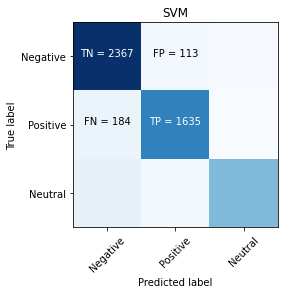

In [ ]:
# classifier_svm

cm = confusion_matrix(y_test,predicted_svm)
# fpr, tpr = print_statistics(cm)
plt.figure()

plot_confusion_matrix(cm, classes=['Negative','Positive', 'Neutral'], title='SVM')
plt.show()


**** Confusion Matrix ****
[[2367  113   68]
 [ 184 1635   43]
 [ 242   87 1084]]
**** Classification Report ****
              precision    recall  f1-score   support

    Negative       0.85      0.93      0.89      2548
    Positive       0.89      0.88      0.88      1862
     Neutral       0.91      0.77      0.83      1413

    accuracy                           0.87      5823
   macro avg       0.88      0.86      0.87      5823
weighted avg       0.88      0.87      0.87      5823



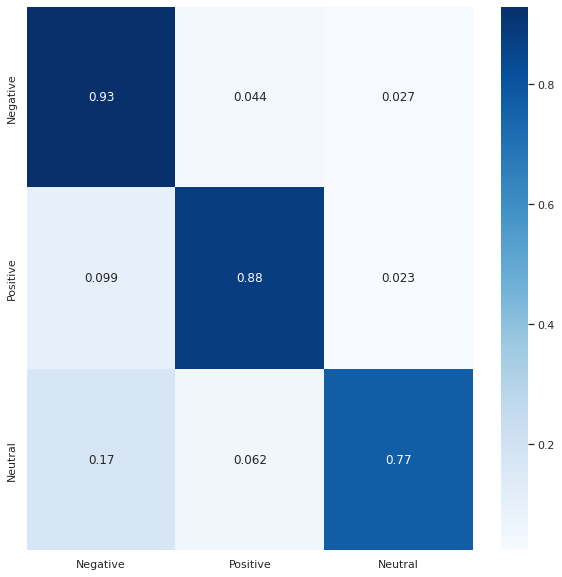

In [ ]:


from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test,y_scores, classNames):
    # y_test=np.argmax(y_test, axis=1)
    # y_scores=np.argmax(y_scores, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y]/np.sum(cm[x,:])
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1.0) # for label size
    df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    df.figure.savefig("image2.png")

classNames = ['Negative','Positive', 'Neutral']
plot_confusion_matrix(y_test.values,predicted_svm, classNames) 

In [ ]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))


10-fold cross-validation:
[0.7202473  0.88304997 0.91344668 0.75218959 0.85059248 0.81710459
 0.81607419 0.87686759 0.83256054 0.76597938]
The average accuracy of the SVM classifier is : 0.82


In [ ]:
pd.crosstab(y_test, predicted_svm, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,-1,0,1,All
Actual,,,,
-1,2367,113,68,2548
0,184,1635,43,1862
1,242,87,1084,1413
All,2793,1835,1195,5823


In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

ValueError: ignored

NameError: ignored

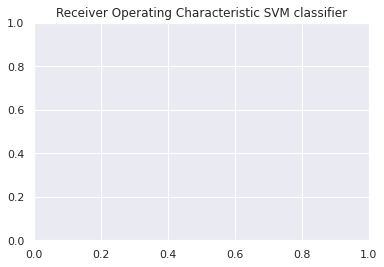

In [ ]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def most_informative_feature(vectorizer, classifier, top_features=20):
    
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    
    top_positive_coefficients = sorted(zip(svm_coef[0], feature_names))[-top_features:]
    top_negative_coefficients = sorted(zip(svm_coef[0], feature_names))[:top_features]
    
    print ("Top Positive Coefficients")
    print ("==========================")
    for coef, feat in top_positive_coefficients:
        print (feat, coef)
        
    print ("")
    print ("Top Negative Coefficients")
    print ("==========================")
    for coef, feat in top_negative_coefficients:
        print (feat, coef) 

In [ ]:
# show the most informatics features for the svm classifier 
most_informative_feature(tf_vec,classifier_svm) 

Top Positive Coefficients
عطن 1.6844879138644249
لله 1.6922833137104458
نتم 1.7014453131536238
لحل 1.7069635484696608
رصددد 1.7273301593147359
لرصد 1.775122667026249
لنس 1.8444843721993314
ضعف 1.846682268347748
لعملء 1.8897032264599152
لمشكله 1.9509959502650371
لنت 1.951229196229555
للسف 1.9654124049801276
لش 2.0119167592884644
سء 2.034648921790674
حت 2.048096779612002
mobily1100 2.0491272479029945
تم 2.2907670126977173
zainhelpsa 2.7855276356500767
stcksa 5.629560330622933
stccare 6.645532055151028

Top Negative Coefficients
stccareksa -5.254968871363795
lebaraksa -3.60703622524746
لتطبق -3.1878782764849554
عرف -2.988162163911957
خص -2.6255554891468975
عرض -2.586023619211881
رقم -2.419074767952175
عد -2.22807867051763
بغ -2.2205796059271403
salammobilesa -2.1210081635363296
5g -2.1033681021670056
yaqootapp -2.079415683376506
لت -2.041959203988366
شرط -2.020307427731923
فعل -1.9622760145156786
لشرط -1.9604659887484233
حتج -1.950733618804236
شحنه -1.9078125660268108
لطرق -1.896430145009

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Real world dataset classefication

In [ ]:
Corpus

array(['غض لنظر لمبلغ لتفه نج نحسب لعملء مضرب 5 بطلع ملن لملن بدن جه حقمبلتسرقعم',
       'لسلم علكم خ ن سكن ح لرمل عن مشكله لنت عند لدرجه ن مقدر تصفح ققل ش لمشكله لعلم تمم',
       'تدن خدمه لنترنت محفظه نتطلع نطلب لفتح فرع بش', ...,
       '@stccare_ksa غلق لبلغت حل للمشكله ن مصدقتكم ن مخف لله لعمل لن نصدقكم نتم ظلمن خءنن للمنه نصبن قمتم بءكل مل بدن حق رسم هتف لعمل تتم حل لمشكل',
       '@stccare_ksa غلق لشكي حله',
       '@stccare_ksa غلق لشكي تم فتح بلغ جدد لش هلكذب'], dtype=object)

In [ ]:

Corpus=np.concatenate(( data_df[' Tweet'],data_collection[:50000]['Comments ']), axis=0)

Tfidf_vect = TfidfVectorizer(max_features=8000)
Tfidf_vect.fit(Corpus)
# Train_X_Tfidf = Tfidf_vect.transform(Train_X)

# Test_X_Tfidf = Tfidf_vect.transform(Test_X)

TfidfVectorizer(max_features=8000)

In [ ]:
Train_X_Tfidf = Tfidf_vect.transform(data_collection[:2000]['Comments '])

In [ ]:
Train_X_Tfidf

<2000x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 16994 stored elements in Compressed Sparse Row format>

In [ ]:
data_collection['Label predicted']='None'
labels={ -1:'Negative', 1:'Positive', 0:'Neutral'}
data_collection['Label predicted'].fillna('Nothing')
for i in range(5):
  if i<4:
    # data_collection=pd.read_excel('./Dataset.xlsx')
    texts=data_collection[i*20000:(i+1)*20000]['Comments ']
    # texts= first_chunk['Comments ']
    # Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
    Test_X_Tfidf = Tfidf_vect.transform(texts)
    predicted_svm = classifier_svm.predict(Test_X_Tfidf)
    data_collection[i*20000:(i+1)*20000]['Label predicted']=[labels[label] for label in predicted_svm]

  else:
    texts=data_collection[i*20000:]['Comments ']
    # texts= first_chunk['Comments ']
    # Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
    texts=texts.fillna('Nothing')#.isna().any()
    Test_X_Tfidf = Tfidf_vect.transform(texts)
    predicted_svm = classifier_svm.predict(Test_X_Tfidf)
    data_collection[i*20000:]['Label predicted']=[labels[label] for label in predicted_svm]


<ipython-input-42-d90076fc5dbc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_collection[i*20000:(i+1)*20000]['Label predicted']=[labels[label] for label in predicted_svm]
<ipython-input-42-d90076fc5dbc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_collection[i*20000:]['Label predicted']=[labels[label] for label in predicted_svm]


In [ ]:
data_collection['Label predicted'].describe()

count     98359   
unique    3       
top       Negative
freq      36665   
Name: Label predicted, dtype: object

In [ ]:
# texts=data_collection[i*20000:]['Comments ']

# Test_X_Tfidf = Tfidf_vect.transform(texts)
# # texts.isna().any()


In [ ]:
data_collection.to_csv('Dataset_labled.csv')